## Quadrature Amplitude Modulation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = fs//baud 
f0 = 1800

In [3]:
#code = { 2: -2+2j, 6: -1+2j, 14: 1+2j, 10: 2+2j,
#        3: -2+1j, 7: -1-1j, 15: 1+1j, 11: 2+1j,
#        1: -2-1j, 5: -1-1j, 13: 1-1j, 9: 2-1j,
#        0: -2-2j, 4: -1-2j, 12: 1-2j, 8: 2-2j}
Nbits = 16  # number of bits
N = Nbits * Ns
code = np.array((-2-2j, -2-1j,-2+2j,-2+1j,-1-2j,-1-1j,-1+2j,-1+1j,+2-2j,+2-1j,+2+2j,+2+1j,1-2j,+1-1j,1+2j,1+1j))/2
np.random.seed(seed=1)
bits = np.int16(np.random.rand(Nbits,1)*16)
bits

array([[ 6],
       [11],
       [ 0],
       [ 4],
       [ 2],
       [ 1],
       [ 2],
       [ 5],
       [ 6],
       [ 8],
       [ 6],
       [10],
       [ 3],
       [14],
       [ 0],
       [10]], dtype=int16)

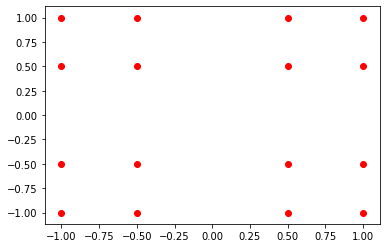

In [21]:
plt.scatter(code.real, code.imag, color='red')

In [12]:
M = np.tile(code[bits],(1,Ns))
print(M.shape)
print(M)

(16, 147)
[[-0.5+1.j  -0.5+1.j  -0.5+1.j  ... -0.5+1.j  -0.5+1.j  -0.5+1.j ]
 [ 1. +0.5j  1. +0.5j  1. +0.5j ...  1. +0.5j  1. +0.5j  1. +0.5j]
 [-1. -1.j  -1. -1.j  -1. -1.j  ... -1. -1.j  -1. -1.j  -1. -1.j ]
 ...
 [ 0.5+1.j   0.5+1.j   0.5+1.j  ...  0.5+1.j   0.5+1.j   0.5+1.j ]
 [-1. -1.j  -1. -1.j  -1. -1.j  ... -1. -1.j  -1. -1.j  -1. -1.j ]
 [ 1. +1.j   1. +1.j   1. +1.j  ...  1. +1.j   1. +1.j   1. +1.j ]]


In [10]:
t = np.r_[0.0:N]/fs
t

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       5.32653061e-02, 5.32879819e-02, 5.33106576e-02])

In [15]:
QAM = np.real(M.ravel()*np.exp(1j*2*np.pi*f0*t))/np.sqrt(2)/2
QAM

array([-0.1767767 , -0.26067563, -0.3275237 , ...,  0.49993577,
        0.48155254,  0.43167082])

Text(0.5, 1.0, 'QAM=16 of the sequence:[[ 6 11  0  4  2  1  2  5  6  8  6 10  3 14  0 10]]')

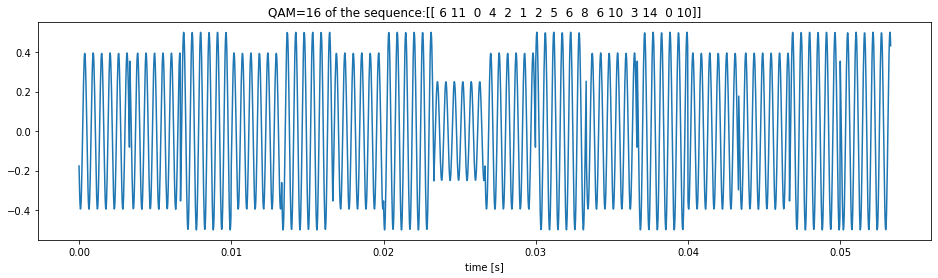

In [16]:
plt.figure(figsize = (16,4))
plt.plot(t,QAM.real)
plt.xlabel('time [s]')
plt.title("QAM=16 of the sequence:"+ np.array2string(np.transpose(bits)))